<a href="https://colab.research.google.com/github/Hemanthjkumar/EDA-DA/blob/main/MOD_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODULE - 3: CORRELATION ANALYSIS AND TIME SERIES ANALYSIS**

**Overview**

This notebook covers a complete analysis of the dataset, including univariate, bivariate, multivariate analysis, and time series analysis. Each section is detailed with various visualizations and statistical techniques.

# Univariate Analysis

**Data Cleaning and Handling Non-Numeric Values**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [4]:
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/HepatitisCdata.csv?raw=true'
data = pd.read_csv(url)

print(data.head(10))
print(data.tail(10))

   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   
5           6  0=Blood Donor   32   m  41.6  43.3  18.5  19.7  12.3   9.92   
6           7  0=Blood Donor   32   m  46.3  41.3  17.5  17.8   8.5   7.01   
7           8  0=Blood Donor   32   m  42.2  41.9  35.8  31.1  16.1   5.82   
8           9  0=Blood Donor   32   m  50.9  65.5  23.2  21.2   6.9   8.69   
9          10  0=Blood Donor   32   m  42.4  86.3  20.3  20.0  35.2   5.46   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.

In [6]:
#Check the data types of each column
data.dtypes

,0
Unnamed: 0,int64
Category,object
Age,int64
Sex,object
ALB,float64
ALP,float64
ALT,float64
AST,float64
BIL,float64
CHE,float64


In [7]:
#Find the descriptive Statistics of the entire dataset
print(data.describe())
pd.isna(data).any()


       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.2056

,0
Unnamed: 0,False
Category,False
Age,False
Sex,False
ALB,True
ALP,True
ALT,True
AST,False
BIL,False
CHE,False


**Data Cleaning**

In [8]:
# Find and list non-numeric values in the dataset
non_numeric_count = data.select_dtypes(include=['object']).nunique()
print("Number of unique non-numeric values in each column:")
print(non_numeric_count)

# List of unique non-numeric values in each column
non_numeric_values = data.select_dtypes(include=['object']).apply(lambda col: col.unique())
print("\nNon-numeric values in each column:")
for col, values in non_numeric_values.items():
    print(f"{col}: {values}")


Number of unique non-numeric values in each column:
Category    5
Sex         2
dtype: int64

Non-numeric values in each column:
Category: ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
Sex: ['m' 'f']


In [9]:
# Handle missing values and clean fields in 'ALT' and 'Age' columns
data['ALT'].fillna(data['ALT'].mean(), inplace=True)  # Fill missing ALT values with mean
data['Age'] = data['Age'].apply(lambda x: 0 if x < 0 else x)  # Replace unrealistic negative values with 0

# Display updated data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         615 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


<ipython-input-9-4efb4e788ac5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ALT'].fillna(data['ALT'].mean(), inplace=True)  # Fill missing ALT values with mean


**Distribution and Visualization**

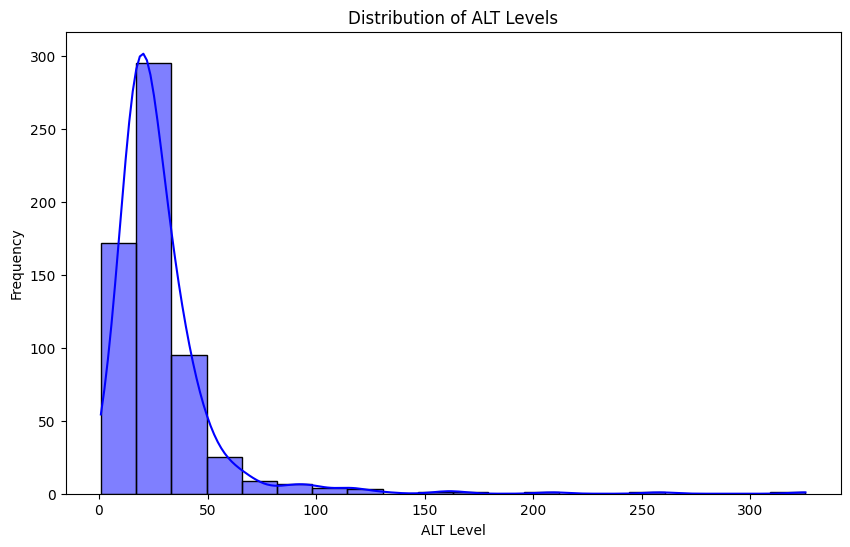

In [10]:

# Plotting the distribution of 'ALT' (Alanine Aminotransferase) with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['ALT'], bins=20, kde=True, color='blue')
plt.title('Distribution of ALT Levels')
plt.xlabel('ALT Level')
plt.ylabel('Frequency')
plt.show()


**Top 30 Largest Values and Visualization**

<ipython-input-12-738590b96c34>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_ALT.index, y=top_30_ALT['ALT'], palette='viridis')  # Using index instead of 'rownames'


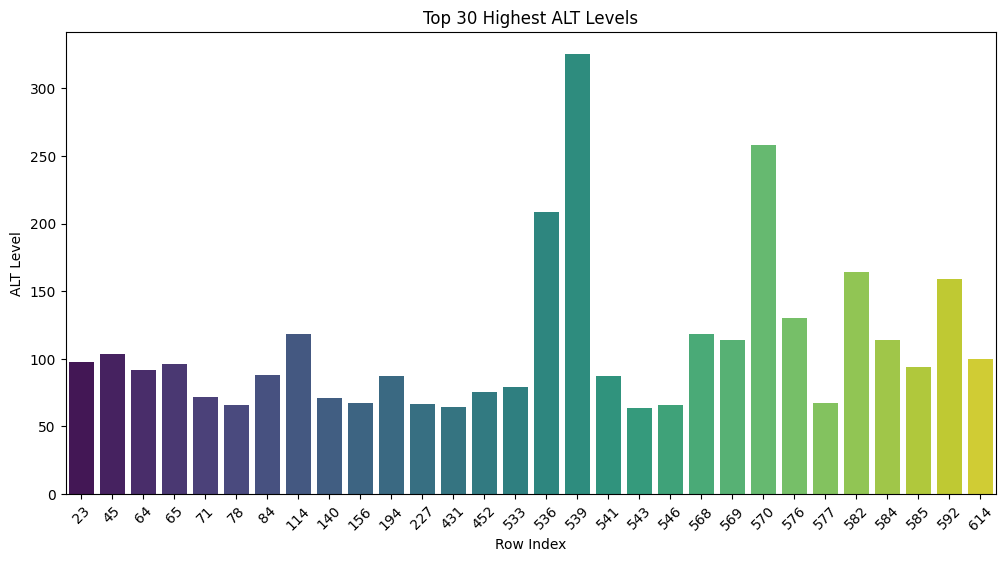

In [12]:
# Displaying and plotting top 30 largest values in 'ALT'
top_30_ALT = data.nlargest(30, 'ALT')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_ALT.index, y=top_30_ALT['ALT'], palette='viridis')  # Using index instead of 'rownames'
plt.title('Top 30 Highest ALT Levels')
plt.xlabel('Row Index')
plt.ylabel('ALT Level')
plt.xticks(rotation=45)
plt.show()


**Distribution plot**

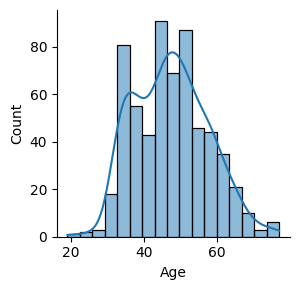

In [13]:
# Creating a distribution plot for 'Age'
g = sns.FacetGrid(data)
g.map(sns.histplot, "Age", kde=True).add_legend()

plt.show()

**Box Plot**

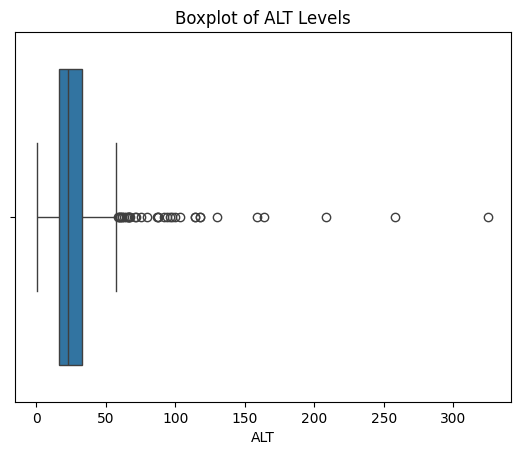

In [14]:
# Boxplot for ALT levels
sns.boxplot(x="ALT", data=data)
plt.title("Boxplot of ALT Levels")
plt.show()

# Bivariate Analysis

**Scatter Plots and Correlation Analysis**

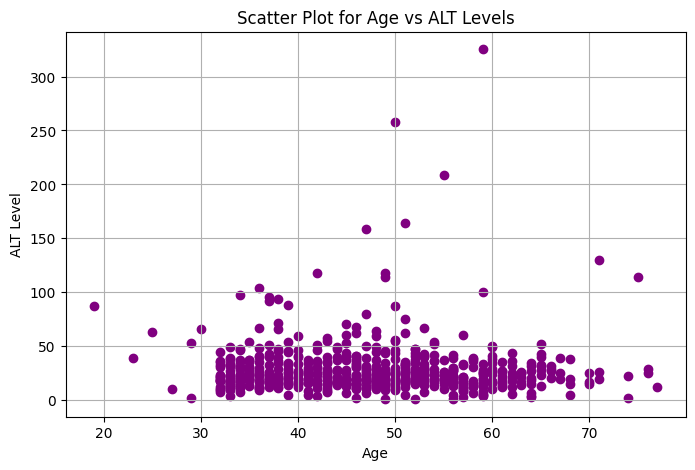

Correlation between 'Age' and 'ALT': -0.01
p-value: 8.82e-01


In [15]:
# Scatter plot for Age vs ALT
plt.figure(figsize=(8, 5))
plt.scatter(data['Age'], data['ALT'], color='purple')
plt.title('Scatter Plot for Age vs ALT Levels')
plt.xlabel('Age')
plt.ylabel('ALT Level')
plt.grid(True)
plt.show()

# Calculate correlation between Age and ALT
corr_age_alt = stats.pearsonr(data['Age'], data['ALT'])
print(f"Correlation between 'Age' and 'ALT': {corr_age_alt[0]:.2f}")
print(f"p-value: {corr_age_alt[1]:.2e}")

**Box Plots for Categorical and Numerical Variables**

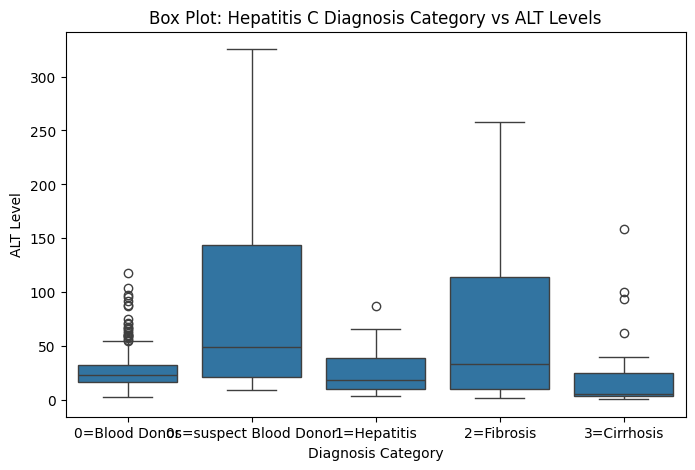

In [16]:
# Box plot for 'Category' (Diagnosis Group) vs 'ALT' (Liver Enzyme Level)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='ALT', data=data)
plt.title('Box Plot: Hepatitis C Diagnosis Category vs ALT Levels')
plt.xlabel('Diagnosis Category')
plt.ylabel('ALT Level')
plt.show()

**Heatmap for Correlation Analysis**

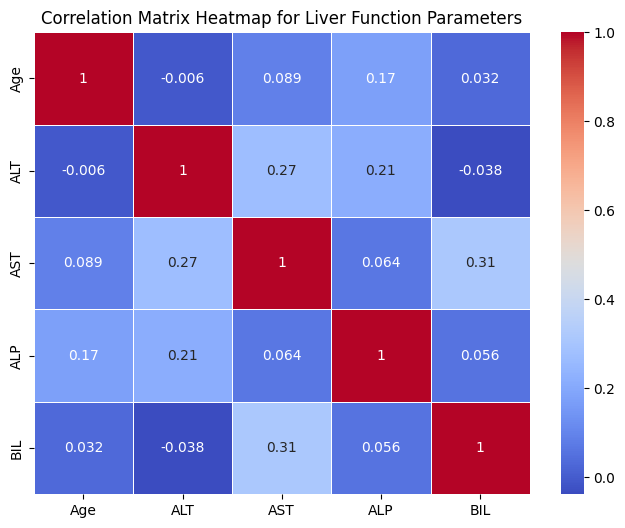

In [20]:
# Selecting relevant numerical columns for correlation
correlation_matrix = data[['Age', 'ALT', 'AST', 'ALP', 'BIL']].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Liver Function Parameters')
plt.show()

# Multivariate Analysis

**Pair Plot Analysis**

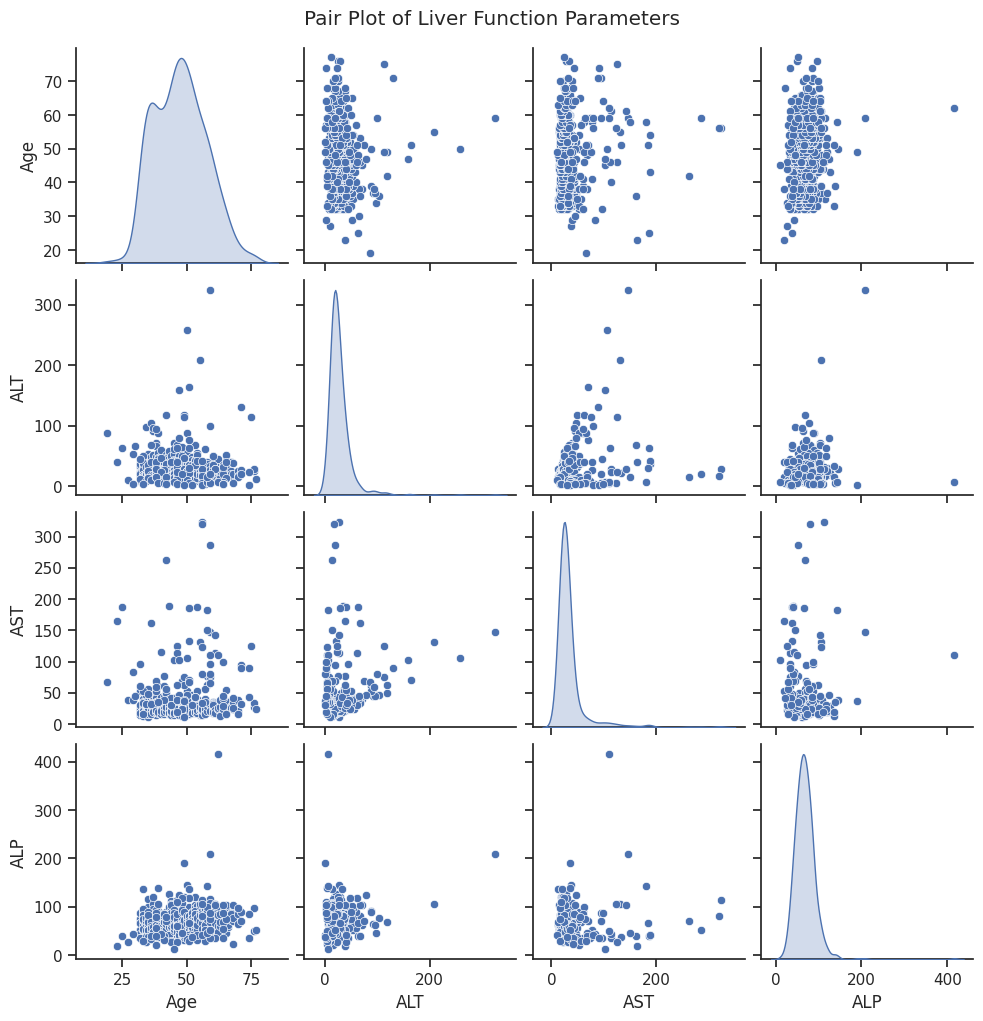

In [21]:
# Selecting relevant numerical columns
selected_columns = ['Age', 'ALT', 'AST', 'ALP']

# Pair plot
sns.set(style='ticks', color_codes=True)
sns.pairplot(data[selected_columns], diag_kind='kde')

# Adjust title position
plt.suptitle('Pair Plot of Liver Function Parameters', y=1.02)
plt.show()

**Pair Plot with Regression Lines**

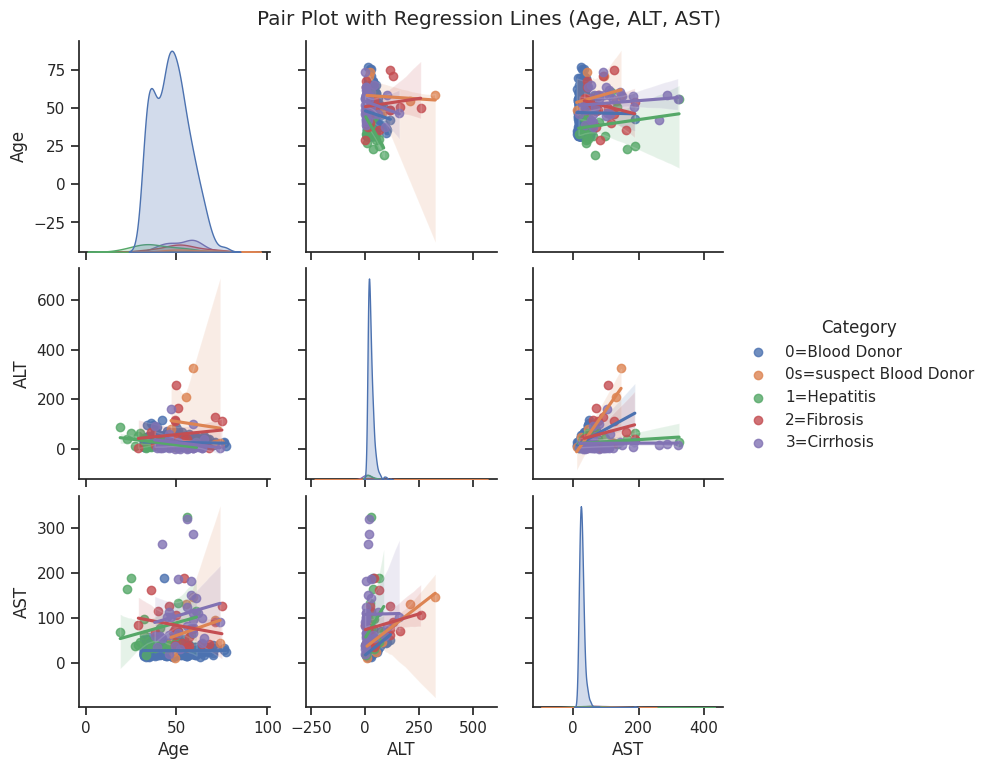

In [22]:
# Pair plot with regression lines
sns.pairplot(data, vars=['Age', 'ALT', 'AST'], kind='reg', hue='Category')

# Adjust title position
plt.suptitle('Pair Plot with Regression Lines (Age, ALT, AST)', y=1.02)
plt.show()

**Complete Correlation Analysis**

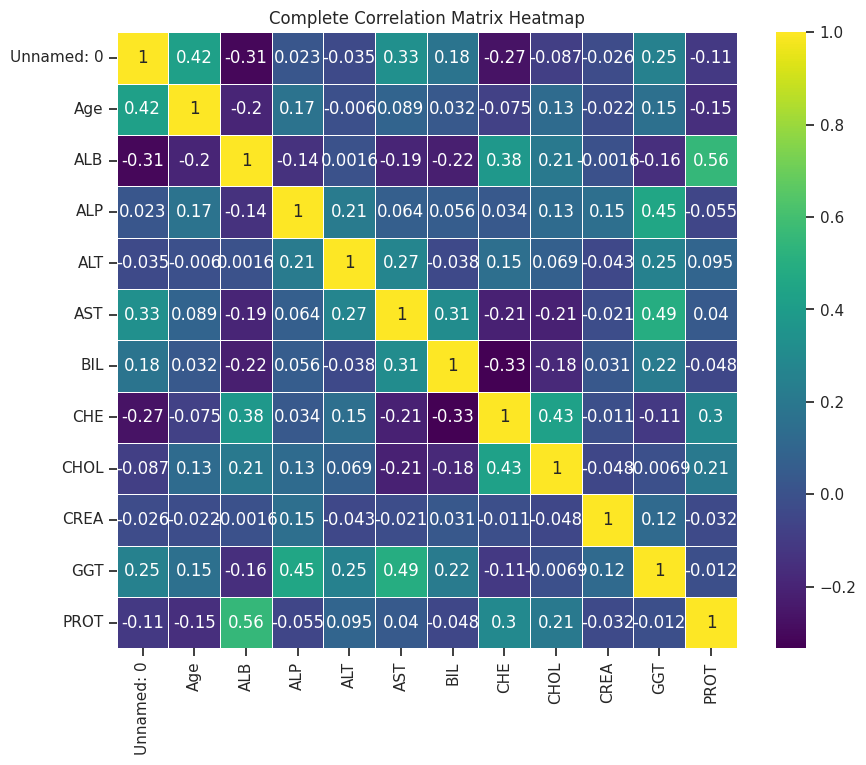

In [23]:
# Compute correlation matrix for numerical columns
correlation_all = data.select_dtypes(include=['number']).corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Complete Correlation Matrix Heatmap')
plt.show()

# Time Series Analysis (Synthetic Time Index)

**Creating a Synthetic Time Index**

In [24]:
# Creating a synthetic time index
data['time_index'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')
data.set_index('time_index', inplace=True)

# Displaying the first few rows with synthetic time index
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
time_index,,,,,,,,,,,,,,
2020-01-01,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2020-01-02,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2020-01-03,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
2020-01-04,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
2020-01-05,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


**Basic Time Series Plot**

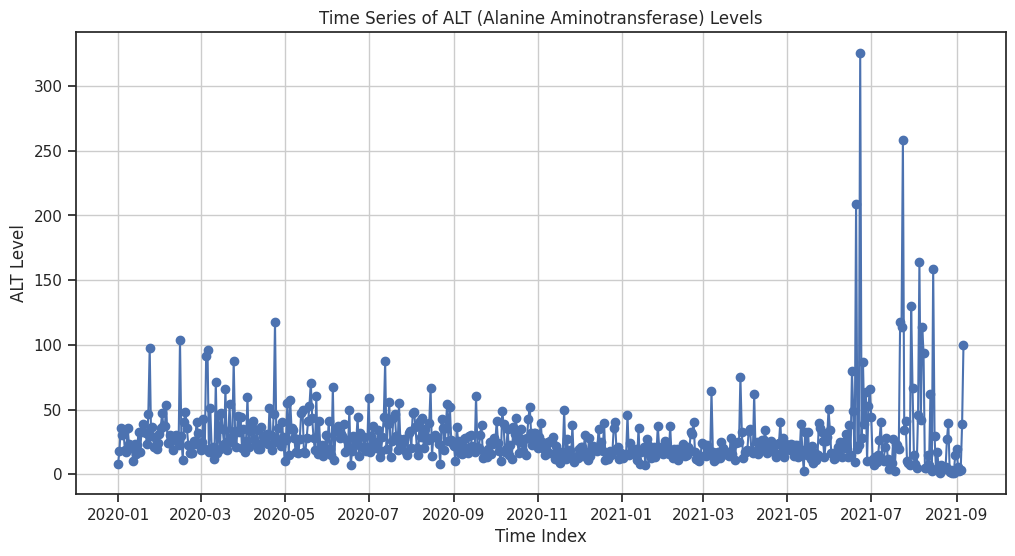

In [25]:
# Plot ALT levels over time
plt.figure(figsize=(12, 6))
plt.plot(data['ALT'], marker='o', linestyle='-', color='b')

# Labels and title
plt.title('Time Series of ALT (Alanine Aminotransferase) Levels')
plt.xlabel('Time Index')
plt.ylabel('ALT Level')
plt.grid(True)

plt.show()

**Resampling and Rolling Mean Analysis**

<ipython-input-26-ca236535b5d1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ALT = data['ALT'].resample('M').mean()


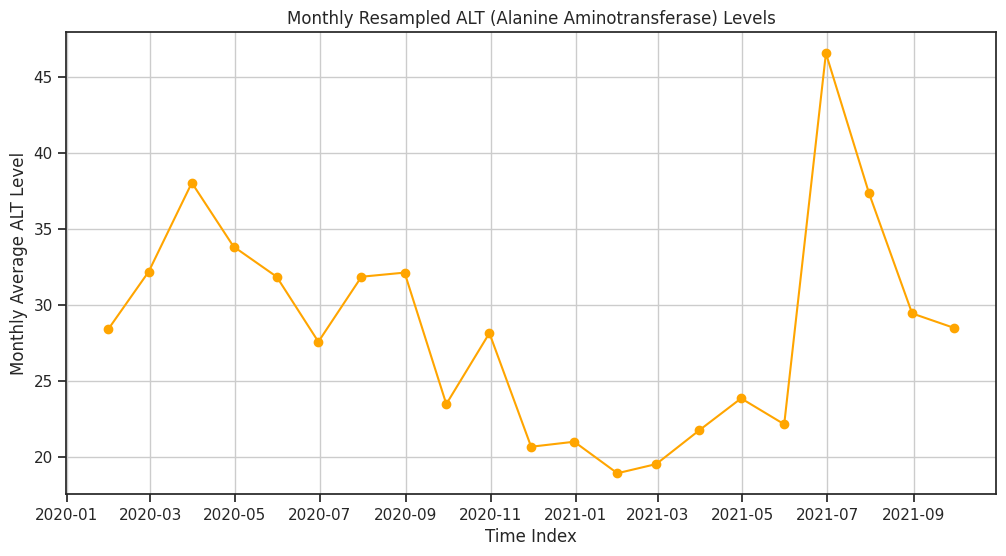

In [26]:
# Resample the data to monthly frequency and calculate mean for ALT
monthly_ALT = data['ALT'].resample('M').mean()

# Plot the monthly resampled ALT levels
plt.figure(figsize=(12, 6))
plt.plot(monthly_ALT, marker='o', color='orange', linestyle='-')

# Titles and labels
plt.title('Monthly Resampled ALT (Alanine Aminotransferase) Levels')
plt.xlabel('Time Index')
plt.ylabel('Monthly Average ALT Level')
plt.grid(True)

plt.show()